# Data Preparation

Importing Libraries

In [1]:
import os
#os.chdir("../")
path_root = os.getcwd()
# path_files = path_root + "\\datasets\\"
path_libs = path_root + "\\libs\\"

import sys
sys.path.append(path_libs)

In [541]:
import importlib
import libs.data_preparation as dprep
import libs.exploratory_data_analysis as eda
importlib.reload(dprep)
importlib.reload(eda)

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
warnings.simplefilter(action='ignore', category=Warning)

Loading and examining the data

In [3]:
df = eda.load_dataset(path_root + "\\assets\\dataset")

In [4]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.96167,1.16913,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.00000,36.00000,English,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,4.00000,4.50000,4.00000,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.95704,1.20548,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.00000,5.00000,All languages,5.00000,2.00000,2.00000,1.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.63589,1.38613,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.00000,13.00000,English,4.00000,3.00000,1.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.64261,1.82446,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,NaN,NaN,NaN,4.00000,34.00000,English,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,4.50000,4.50000,4.50000,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.20886,2.96047,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.50000,11.00000,All languages,11.00000,4.00000,7.00000,0.00000,0.00000,0.00000,4.50000,4.50000,4.50000,NaN,NaN


In [532]:
df.loc[df['country'].str.contains('France') and , ['gluten_free']].value_counts()

gluten_free
N              152638
Y                2650
dtype: int64

In [5]:
df.tail()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
1083392,g9710275-d10770782,Complex Popas Pacurari,"[""Europe"", ""Romania"", ""Northeast Romania"", ""Ia...",Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",47.17295,27.51911,Unclaimed,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,NaN,NaN,NaN,"Lunch, Dinner",NaN,NaN,NaN,N,N,N,"{""Mon"": [""10:00-22:00""], ""Tue"": [""10:00-22:00""...",7.00000,84.00000,7.00000,2.50000,2.00000,English,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN
1083393,g9716321-d15026574,Casa Pastravarului DORIPESCO,"[""Europe"", ""Romania"", ""Transylvania"", ""Central...",Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",45.90442,25.47051,Claimed,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,"Mid-range, Eastern European",€€-€€€,NaN,"Breakfast, Lunch, Dinner, Brunch, Drinks",Eastern European,NaN,NaN,N,N,N,"{""Mon"": [""08:00-22:00""], ""Tue"": [""08:00-22:00""...",7.00000,98.00000,7.00000,2.00000,6.00000,English,5.00000,0.00000,1.00000,1.00000,1.00000,2.00000,NaN,NaN,NaN,NaN,NaN
1083394,g9722813-d15891057,Hanul Tentea,"[""Europe"", ""Romania"", ""Transylvania"", ""Northwe...",Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",47.63192,24.45091,Unclaimed,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,3.00000,2.00000,English,2.00000,1.00000,0.00000,0.00000,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN
1083395,g9726871-d21391722,Casa Paduraru,"[""Europe"", ""Romania"", ""Southern Romania"", ""Arg...",Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",44.91895,24.86763,Claimed,NaN,NaN,NaN,"Cheap Eats, French, American, Bar",€,€2-€8,"Breakfast, Lunch, Dinner, Brunch, Drinks","French, American, Bar, International, European...",NaN,NaN,N,N,N,"{""Mon"": [""10:00-21:00""], ""Tue"": [""10:00-21:00""...",5.00000,55.00000,5.00000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083396,g9867250-d14979687,Pastravaria Alina Sarbi,"[""Europe"", ""Romania"", ""Transylvania"", ""Northwe...",Romania,Transylvania,Maramures County,Budesti,"Str. Principala Nr 166A, Budesti 437071 Romania",47.75222,23.93834,Unclaimed,NaN,#1 of 1 Restaurant in Budesti,#1 of 1 places to eat in Budesti,Diner,NaN,NaN,NaN,Diner,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,1.50000,3.00000,English,2.00000,0.00000,0.00000,1.00000,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN


Shape of dataframe

In [29]:
print(df.shape)

(1083397, 42)


Data types of the dataframe columns

In [162]:
print(df.dtypes)

restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetarian_friendly                   object
vegan_opti

# Data Cleaning

## Columns with mixed data type

Determine the object type columns for examining the mixed type structure

In [157]:
print(df.dtypes[df.dtypes=="O"])
columns_object_type = df.dtypes[df.dtypes=="O"].index.tolist()
print(columns_object_type)

restaurant_link        object
restaurant_name        object
original_location      object
country                object
region                 object
province               object
city                   object
address                object
claimed                object
awards                 object
popularity_detailed    object
popularity_generic     object
top_tags               object
price_level            object
price_range            object
meals                  object
cuisines               object
special_diets          object
features               object
vegetarian_friendly    object
vegan_options          object
gluten_free            object
original_open_hours    object
default_language       object
keywords               object
dtype: object
['restaurant_link', 'restaurant_name', 'original_location', 'country', 'region', 'province', 'city', 'address', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisin

Finding out the specific type of the object columns and extracting the mixed types in a list

In [188]:
columns_mixed_type = list()
for column in df.columns:
    type_specific = pd.api.types.infer_dtype(df[column], skipna=False) 
    print(type_specific)
    if('mixed' in type_specific):
        columns_mixed_type.append(column)
print(columns_mixed_type)

string
string
string
string
mixed
mixed
mixed
string
floating
floating
mixed
mixed
mixed
mixed
mixed
mixed
mixed
mixed
mixed
mixed
mixed
string
string
string
mixed
floating
floating
floating
floating
floating
mixed
floating
floating
floating
floating
floating
floating
floating
floating
floating
floating
mixed
['region', 'province', 'city', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'original_open_hours', 'default_language', 'keywords']


## Number of rows per data type

In [192]:
for column in columns_mixed_type:
    print('------------------------------------------')
    print(df[column].apply(type).value_counts())

------------------------------------------
<class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64
------------------------------------------
<class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64
------------------------------------------
<class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64
------------------------------------------
<class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64
------------------------------------------
<class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64
------------------------------------------
<class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64
------------------------------------------
<class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, dtype: int64
------------------------------------------
<class 'str'>      972763
<class 'float'>    110634
Name: top_tags, dtype

Missing values

In [264]:
print(df[columns_mixed_type].isnull().sum())

region                  50323
province               340632
city                   400685
claimed                  1842
awards                 820264
popularity_detailed     94988
popularity_generic      97792
top_tags               110634
price_level            277205
price_range            779070
meals                  448050
cuisines               169103
special_diets          743141
features               765990
original_open_hours    489565
default_language        95193
keywords               984199
dtype: int64


In [266]:
for column in columns_mixed_type:
    temp = df[column].apply(type).value_counts()
    print(column, temp[temp.index == float][0])

region 50323
province 340632
city 400685
claimed 1842
awards 820264
popularity_detailed 94988
popularity_generic 97792
top_tags 110634
price_level 277205
price_range 779070
meals 448050
cuisines 169103
special_diets 743141
features 765990
original_open_hours 489565
default_language 95193
keywords 984199


## Solving mixed data type problem

Missing values for mixed type columns are equal to the number of floats for the same column. That means all float values are NaN for the mixed type columns. Removing missing values will solve the mixed data type problem. But that will bring another problem. Missing values are quite much for some features as seen from the table below, removing them will reduce the data amount quite much and will cause a huge data loss.

In [267]:
dprep.missing_values_table(df, na_name=False)

                                   n_miss    ratio
keywords                           984199 90.84000
atmosphere                         821612 75.84000
awards                             820264 75.71000
price_range                        779070 71.91000
features                           765990 70.70000
special_diets                      743141 68.59000
working_shifts_per_week            489565 45.19000
open_hours_per_week                489565 45.19000
original_open_hours                489565 45.19000
open_days_per_week                 489565 45.19000
food                               484072 44.68000
value                              480705 44.37000
service                            479110 44.22000
meals                              448050 41.36000
city                               400685 36.98000
province                           340632 31.44000
price_level                        277205 25.59000
cuisines                           169103 15.61000
top_tags                       

From the graphs below, missing value correlation and structered missing values can be extracted. With this information instead of removing missing values, the other solutions such as filling with a mean, min, max or knn may be applied to solve mixed data type problem.

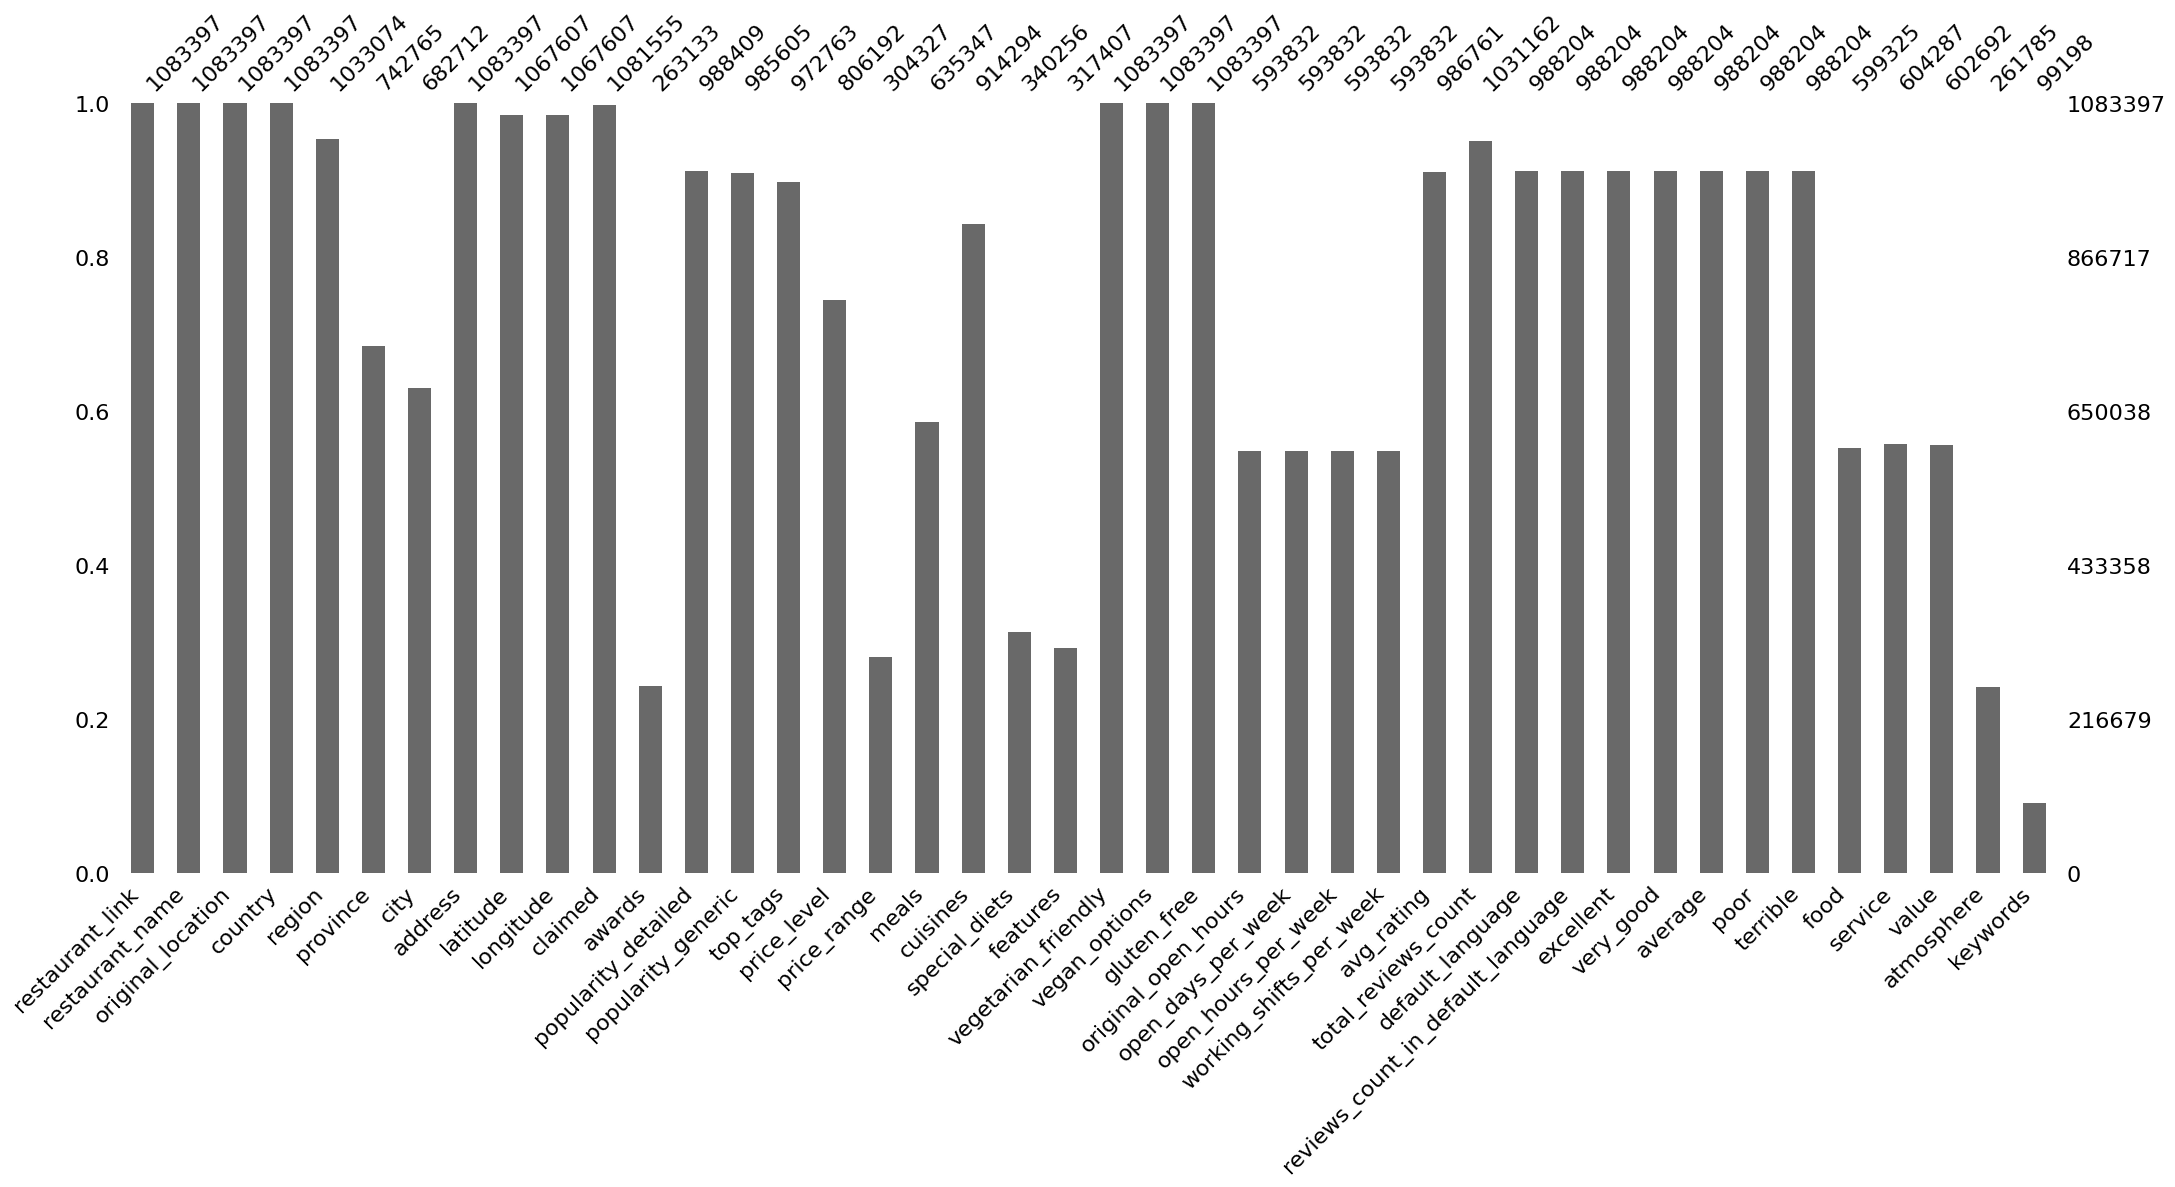

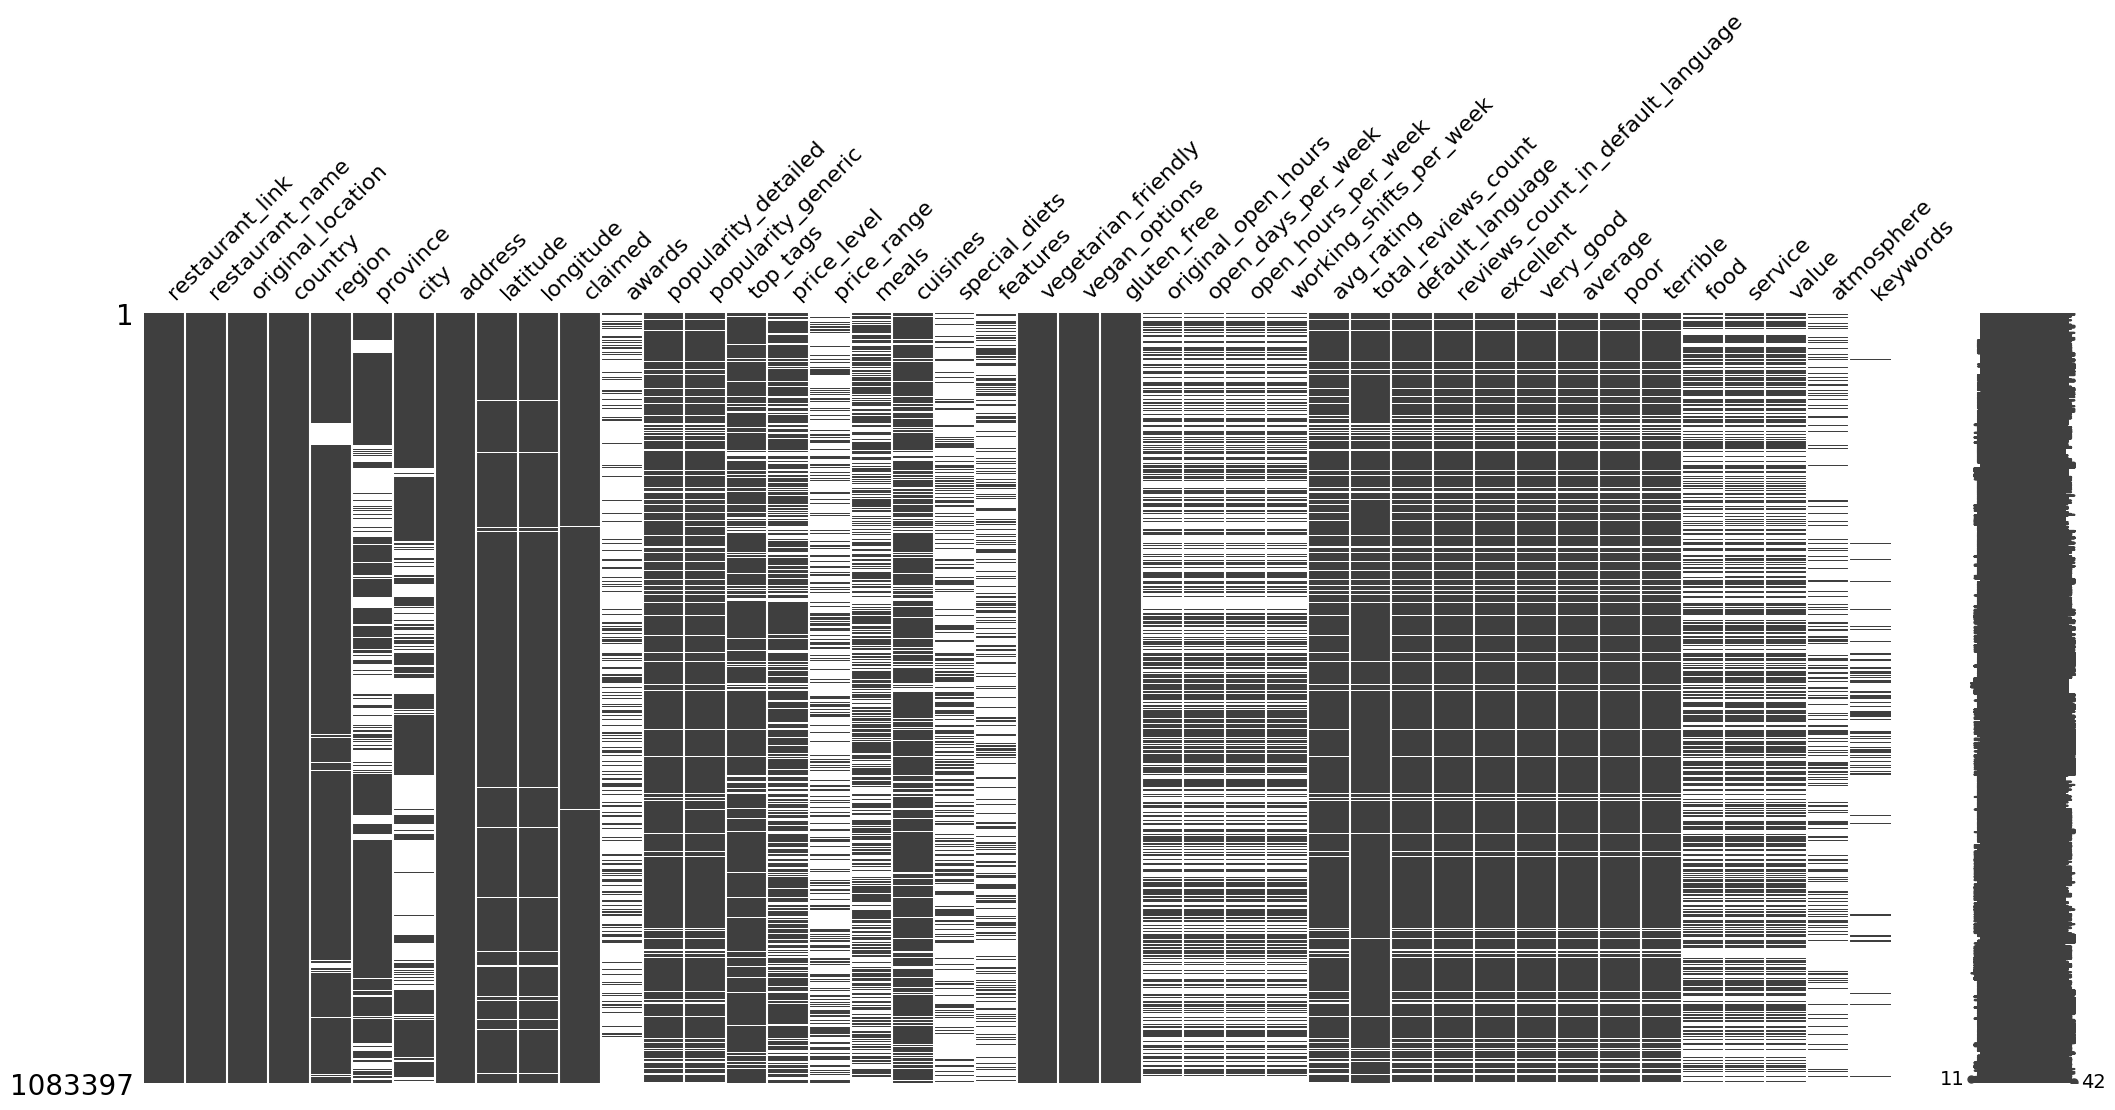

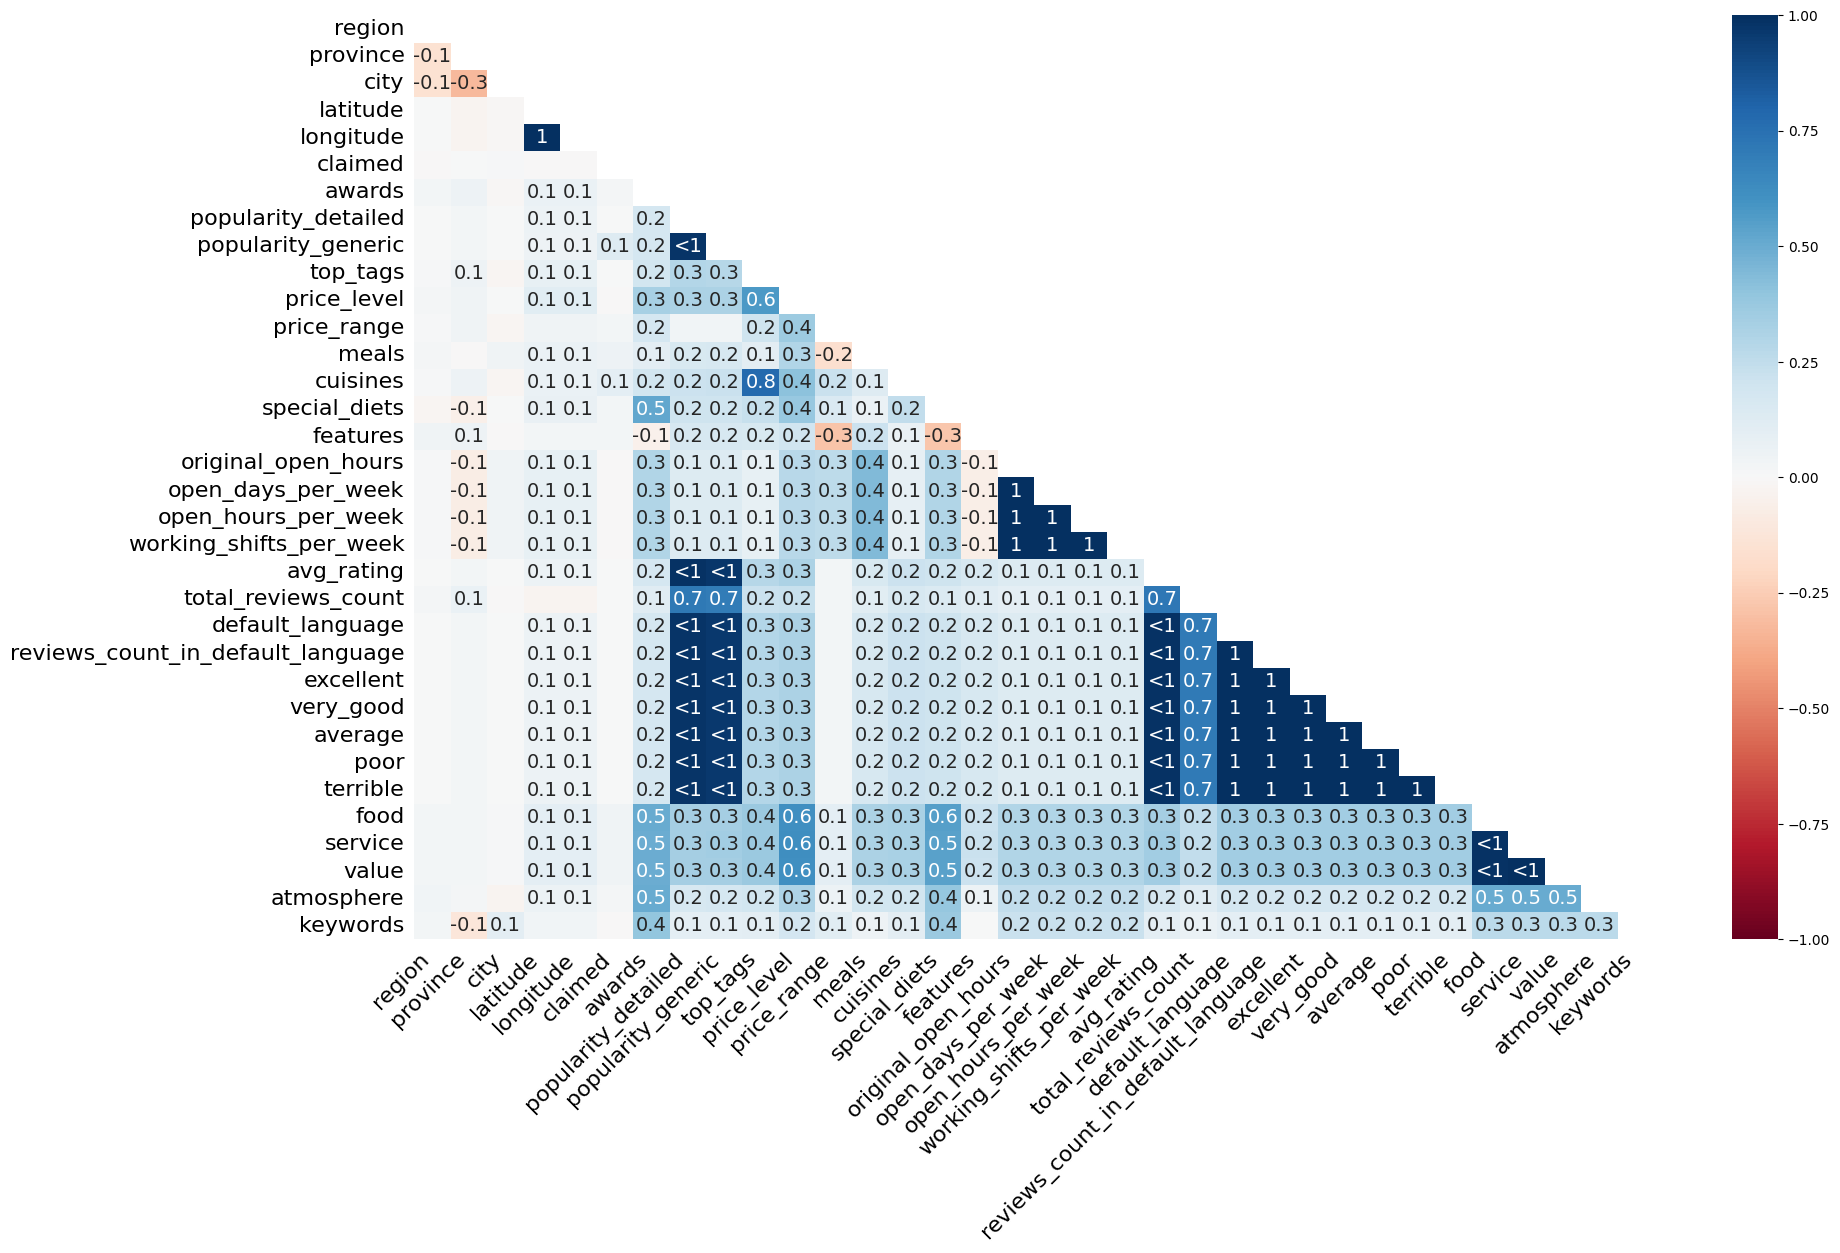

In [268]:
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

# Data Understanding

In [269]:
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

## Correlation between review and rating columns

As seen from the heat map below, "terrible", "excellent" and "terrible" review columns are mostly correlated with the rating columns. 

"average" review column is mid correlated with the rating columns. 

"very_good", "total_reviews_count" and "reviews_count_in_default_language" review columns are the lowest correlated with the rating columns. 

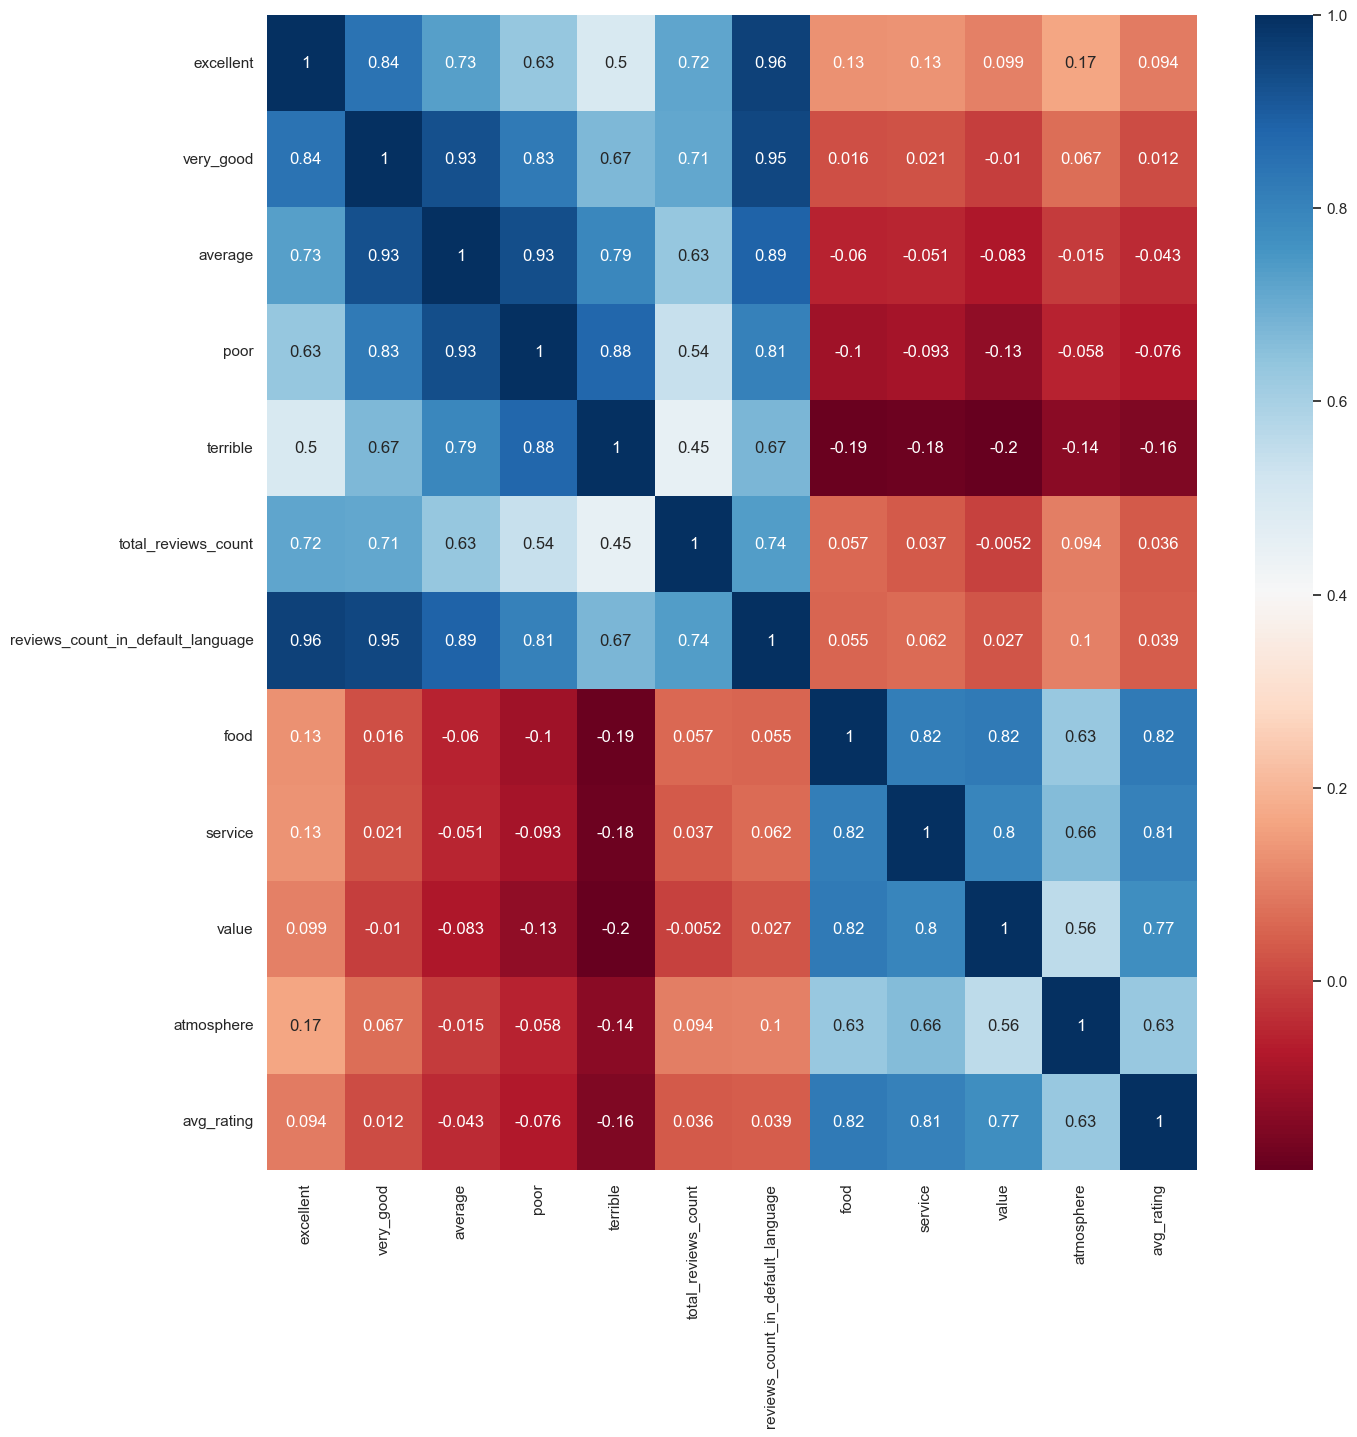

['average', 'poor', 'reviews_count_in_default_language']

In [280]:
eda.high_correlated_cols(df, review_columns + rating_columns, plot=True, corr_th=0.90)

Filling missing values of some review columns with min value. Because filling with the average may mislead the distribution, instead filling it with min or zero would be a better choice.

In [ ]:
for column in ["excellent", "very_good", "average", "poor", "terrible"]:
    df[column + "_new"] = df[column].fillna(df[column].min())

Filling missing values of rating columns with median value. Because filling with other than median such as min or max may mislead the distribution, instead filling with median will keep the distribution balanced.

In [ ]:
for column in rating_columns:
    df[column + "_new"] = df[column].fillna(df[column].median())

Creating a future as a metric of average values of all reviews

In [ ]:
df['avg_review_new'] = (1*df['terrible_new'] + 2*df['poor_new'] + 3*df['average_new'] + 4*df['very_good_new'] + 5*df['excellent_new']) / (df['terrible_new'] + df['poor_new'] + df['average_new'] + df['very_good_new'] + df['excellent_new'])

Creating new lists for examining the results

In [ ]:
rating_columns_new = [item + '_new' for item in rating_columns]
rating_columns_new

review_columns2 = [item for item in review_columns if item not in ['total_reviews_count','reviews_count_in_default_language']]
review_columns2_new = [item + '_new' for item in review_columns2] + ['avg_review_new']
review_columns2_new

By grouping the review and rating columns with respect to vegeterian friendly restaurants and getting the mean we can easily compare vegeterian and non-vegeterian restaurants. 

From the table table below, by considering the values at the columns 'avg_review_new', 'food_new', 'service_new', 'value_new', 'atmosphere_new', 'avg_rating_new', vegeterian friendly restaurants seem better.

In [354]:
df[['vegetarian_friendly'] + review_columns2_new + rating_columns_new].groupby('vegetarian_friendly').agg('mean')

,excellent_new,very_good_new,average_new,poor_new,terrible_new,avg_review_new,food_new,service_new,value_new,atmosphere_new,avg_rating_new
vegetarian_friendly,,,,,,,,,,,
N,7.41515,3.79356,1.59051,0.93052,1.49327,4.02571,3.98607,3.97496,3.94882,3.97038,3.97173
Y,57.81090,23.10378,8.80519,5.00252,5.51218,4.25418,4.22534,4.18410,4.08813,4.01583,4.17571


## Significantly more expensive cuisines 

Price range column is divided into low and high price columns by converting the to float numbers. Unknown numbers such as 1,000,000 and NaN numbers left as NaN numers.

In [493]:
df['price_range_new'] = df['price_range'].apply(lambda x: x.replace('€','').replace('CHF', '').replace(' ', '').replace(u'\xa0', u'').split('-') if type(x)==str else x)

df['price_low_new'] = df['price_range_new'].apply(lambda x: x[0] if type(x)==list else x)
df['price_high_new'] = df['price_range_new'].apply(lambda x: x[1] if type(x)==list else x)

df['price_low_new'] = df['price_low_new'].apply(lambda x: (float(x) if x.isdigit() else np.NaN) if type(x)==str else x)
df['price_high_new'] = df['price_high_new'].apply(lambda x: (float(x) if x.isdigit() else np.NaN) if type(x)==str else x)

Outlier analysis has been made for high price column and 2206 outliers have been detected as significant expensive value. Corresponding indexes define the cuisines. 

(2206,)


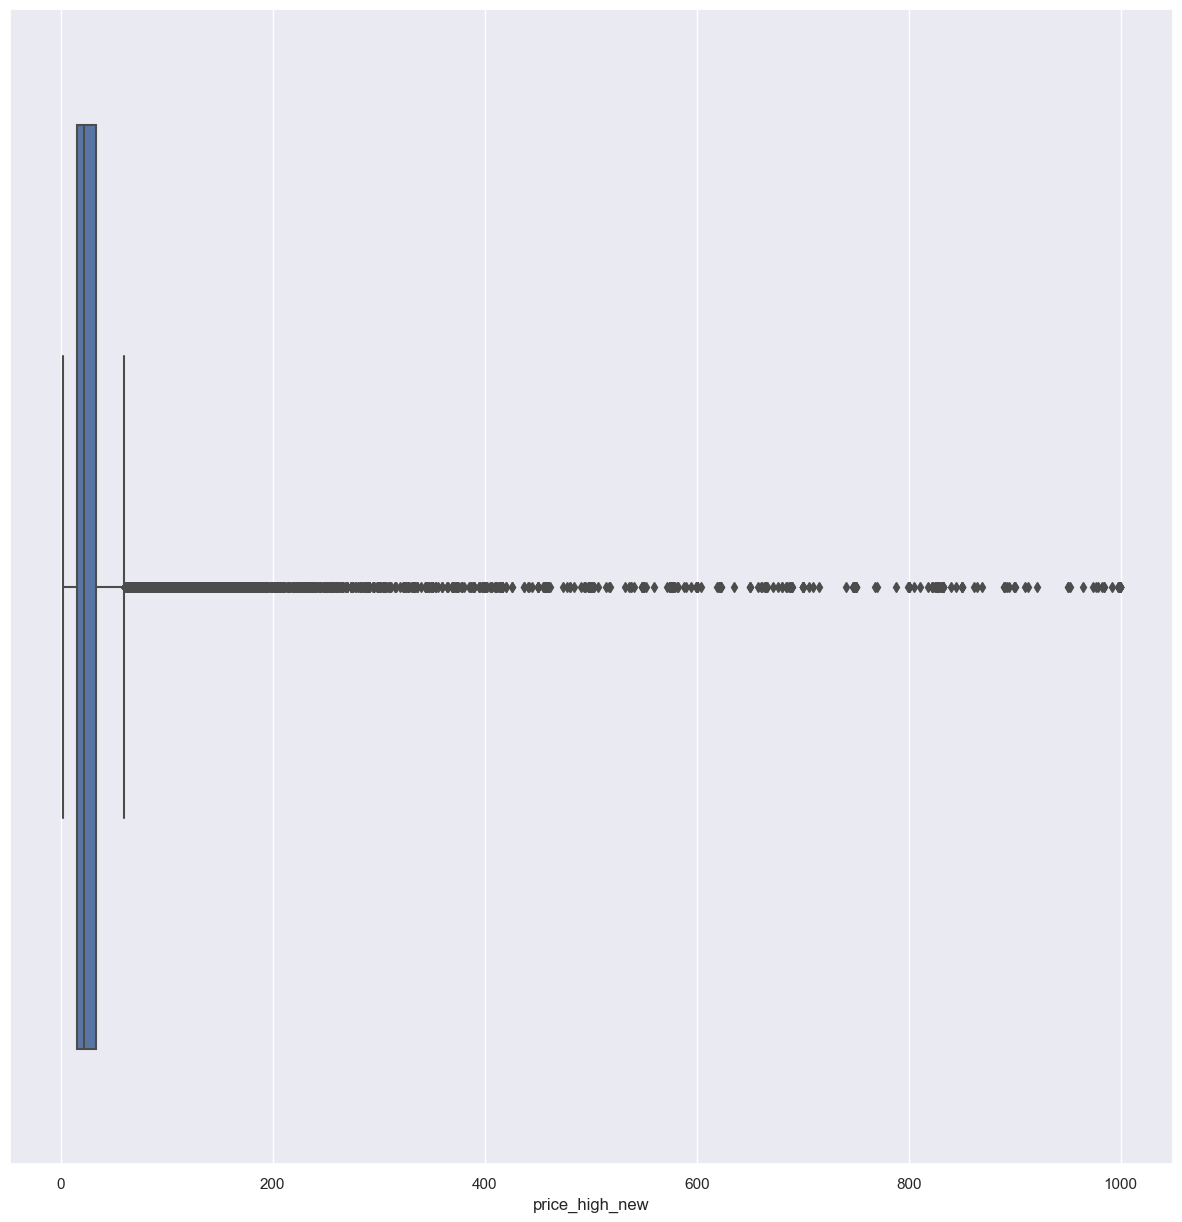

In [495]:
outlier_index = dprep.grab_outliers(df, 'price_high_new', index=True, q1=0.00, q3=0.95)
print(outlier_index.shape)

sns.boxplot(x=df["price_high_new"])
plt.show()

# Business-specific

## 5 capitals to open gluten-free restaurants

In [573]:
df2 = eda.load_dataset(path_root + "\\assets\\europe_capitals_population_and_area", sep=';')

In [574]:
df2

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"
5,6,Brussels,Belgium,1191604,"161,38"
6,7,Budapest,Hungary,1779361,"525,2"
7,8,Copenhagen,Denmark,602481,"88,25"
8,9,Dublin,Ireland,527612,115
9,10,Edinburgh,Scotland,482005,264


In [575]:
for column in df2.columns:
    print(pd.api.types.infer_dtype(df2[column], skipna=False))

integer
string
string
integer
string


Converting the area in km2 column from string to float

In [576]:
df2['Area in km2 ']=df2['Area in km2 '].apply(lambda x: float(x.replace(',', '.')))

In [577]:
for column in df2.columns:
    print(pd.api.types.infer_dtype(df2[column], skipna=False))

integer
string
string
integer
floating


Creating population density column

In [581]:
df2['population_density'] = df2['Population'] / df2['Area in km2 ']

In [578]:
dfx = df.dropna(subset=['city'])

Calculating the gluten free restaurant numbers in df dataframe by using the city names in df2 datafreame as filter

In [579]:
df2['gluten_free_restaurant_number'] = df2['City'].apply(lambda x: dfx.loc[(dfx['city'] ==x) & (dfx['gluten_free'] =='Y'), ['gluten_free']].shape[0])

Considering the gluten free restaurant numbers and the population density, Barcelona, London, Geneva, Lyon and Brussels are the 5 capitals to open that restaurant. Because there is no gluten free restaurants in these cities and their population densities are the top 5 among the cities which have no gluten free restaurants.

In [582]:
df2

,CityNo,City,Country,Population,Area in km2,gluten_free_restaurant_number,population_density
0,1,Amsterdam,Netherland,851573,219.32000,622,3882.78771
1,2,Athens,Greece,664046,2929.00000,271,226.71424
2,4,Barcelona,Spain,1620809,101.40000,0,15984.30966
3,4,Berlin,Germany,3711930,891.70000,0,4162.75653
4,5,Bratislava,Slovakia,424428,367.60000,67,1154.59195
5,6,Brussels,Belgium,1191604,161.38000,0,7383.83939
6,7,Budapest,Hungary,1779361,525.20000,433,3387.96839
7,8,Copenhagen,Denmark,602481,88.25000,251,6826.98017
8,9,Dublin,Ireland,527612,115.00000,596,4587.93043
9,10,Edinburgh,Scotland,482005,264.00000,0,1825.77652


## Various business ideas

According to the rating and the reviews of the cuisines we can decide to open new restaurants related to those cuisines in the cities considering the population density and cuisine density.

# Bonus

In [583]:
import json

In [584]:
f = open(path_root + "\\assets\\paris_bounding_polygon.json")
data = json.load(f)

In [586]:
import geopandas as gpd
import geoplot as gplt

ModuleNotFoundError: No module named 'geopandas'

I was going to solve the bonus question, but I had problems installing C++ to my computer for geoplot. That's why I could not apply the methodology. I would going to extract the city boundaries in lattitude and longtitude from the data file, after that I would going to filter df dataframe according to the Italian cuisine and get their coordinates and point them on the map. After I would going to determine the free areas in the map for the best location to open an Italian restaurant.